In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import kagglehub

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r"D:\Projects\Heart Disease Prediction\heart.csv"

df = pd.read_csv(file_path)

In [3]:
print("Dataset Preview")
df.head()

Dataset Preview


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print("\nDataset Info")
df.info()


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print("\nChecking for Missing Values in the Dataset")
df.isnull().sum()


Checking for Missing Values in the Dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print("\nDataset Statistics:")
df.describe().T


Dataset Statistics:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


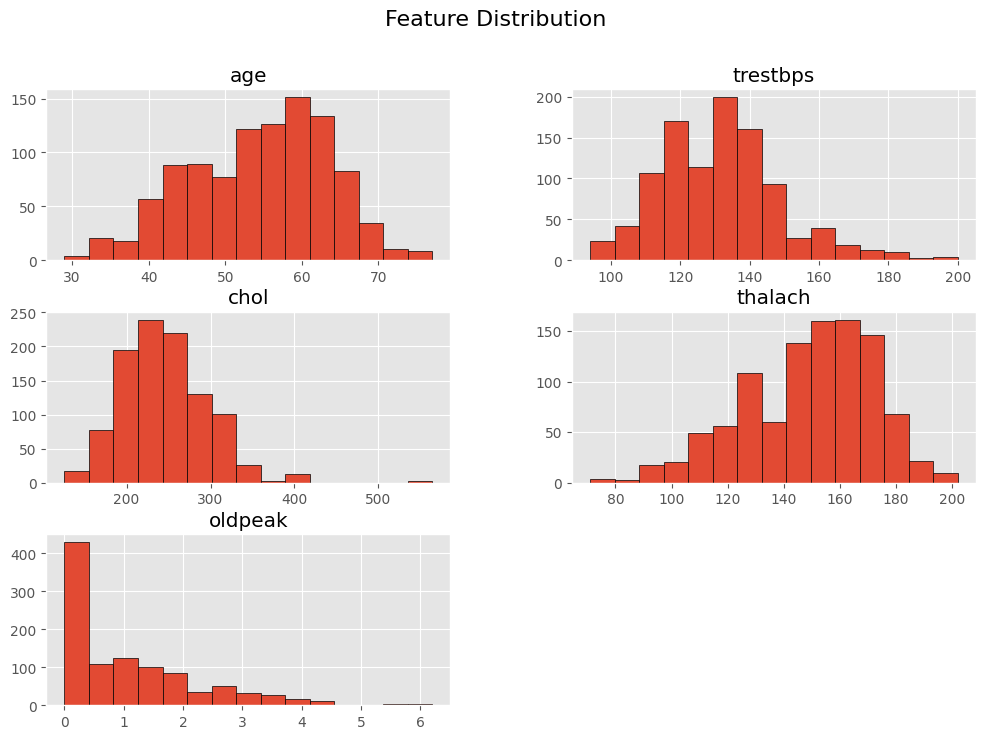

In [7]:
plt.style.use("ggplot")

num_features = ["age","trestbps","chol","thalach","oldpeak"]

df[num_features].hist(figsize = (12,8), bins=15, edgecolor="black")
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

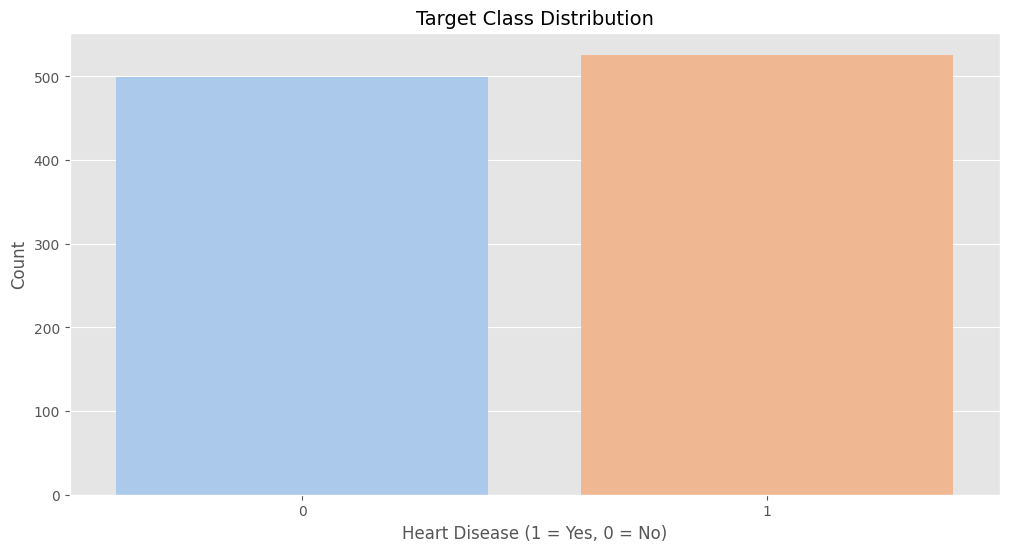

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['target'], palette='pastel')
plt.title("Target Class Distribution", fontsize=14)
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show

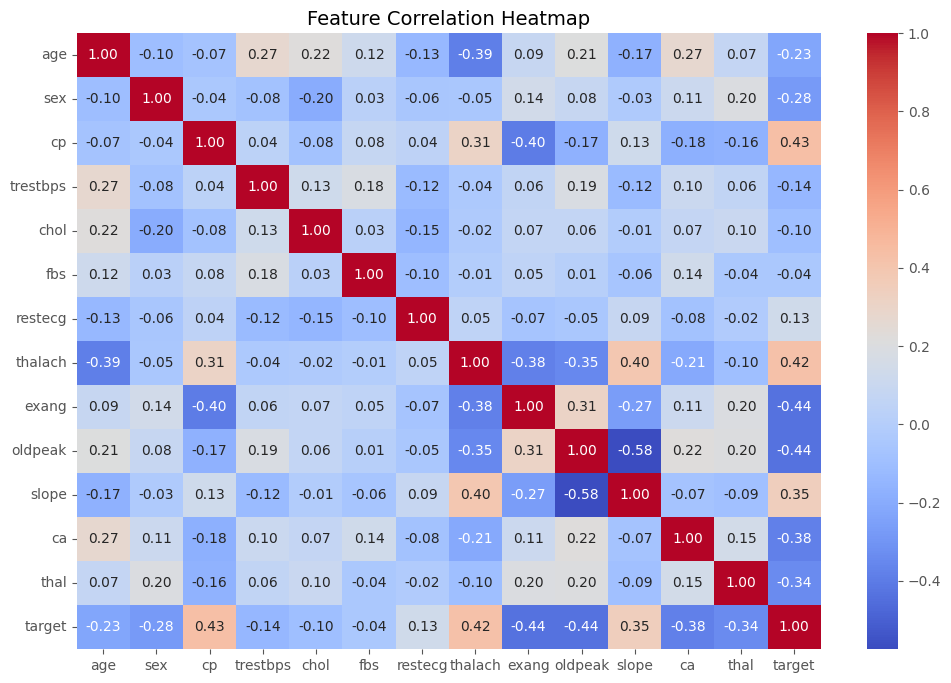

In [9]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

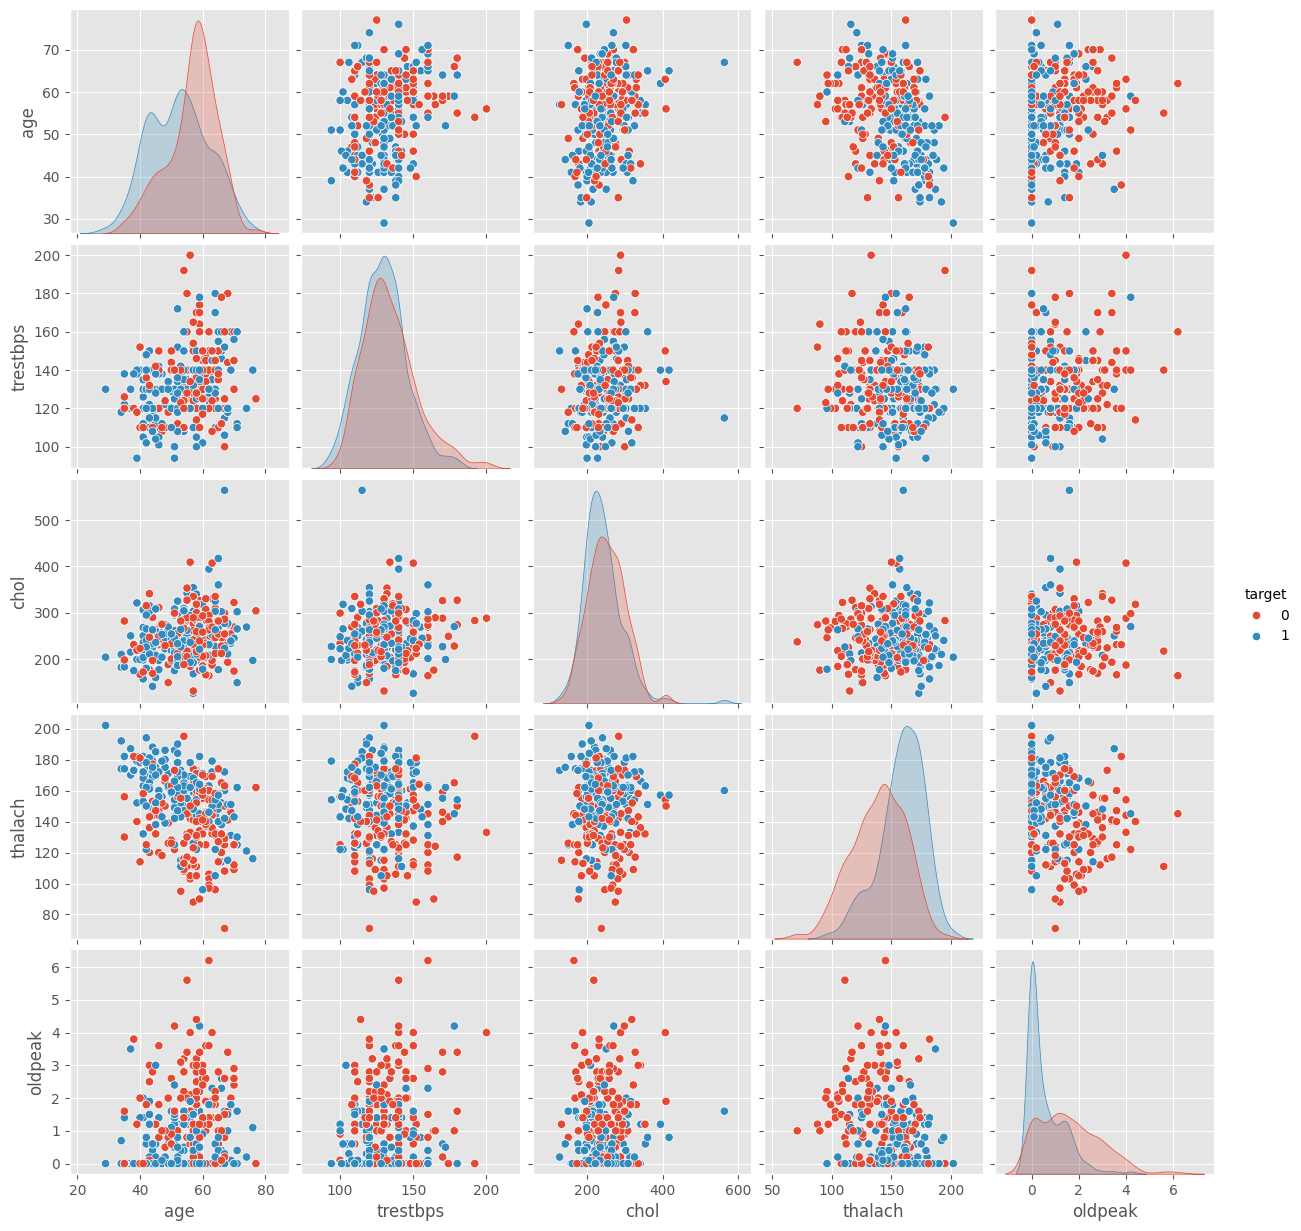

In [10]:
num_features = ["age","trestbps","chol","thalach","oldpeak"]

sns.pairplot(df[["age","trestbps","chol","thalach","oldpeak","target"]], hue='target', diag_kind='kde')
plt.show()

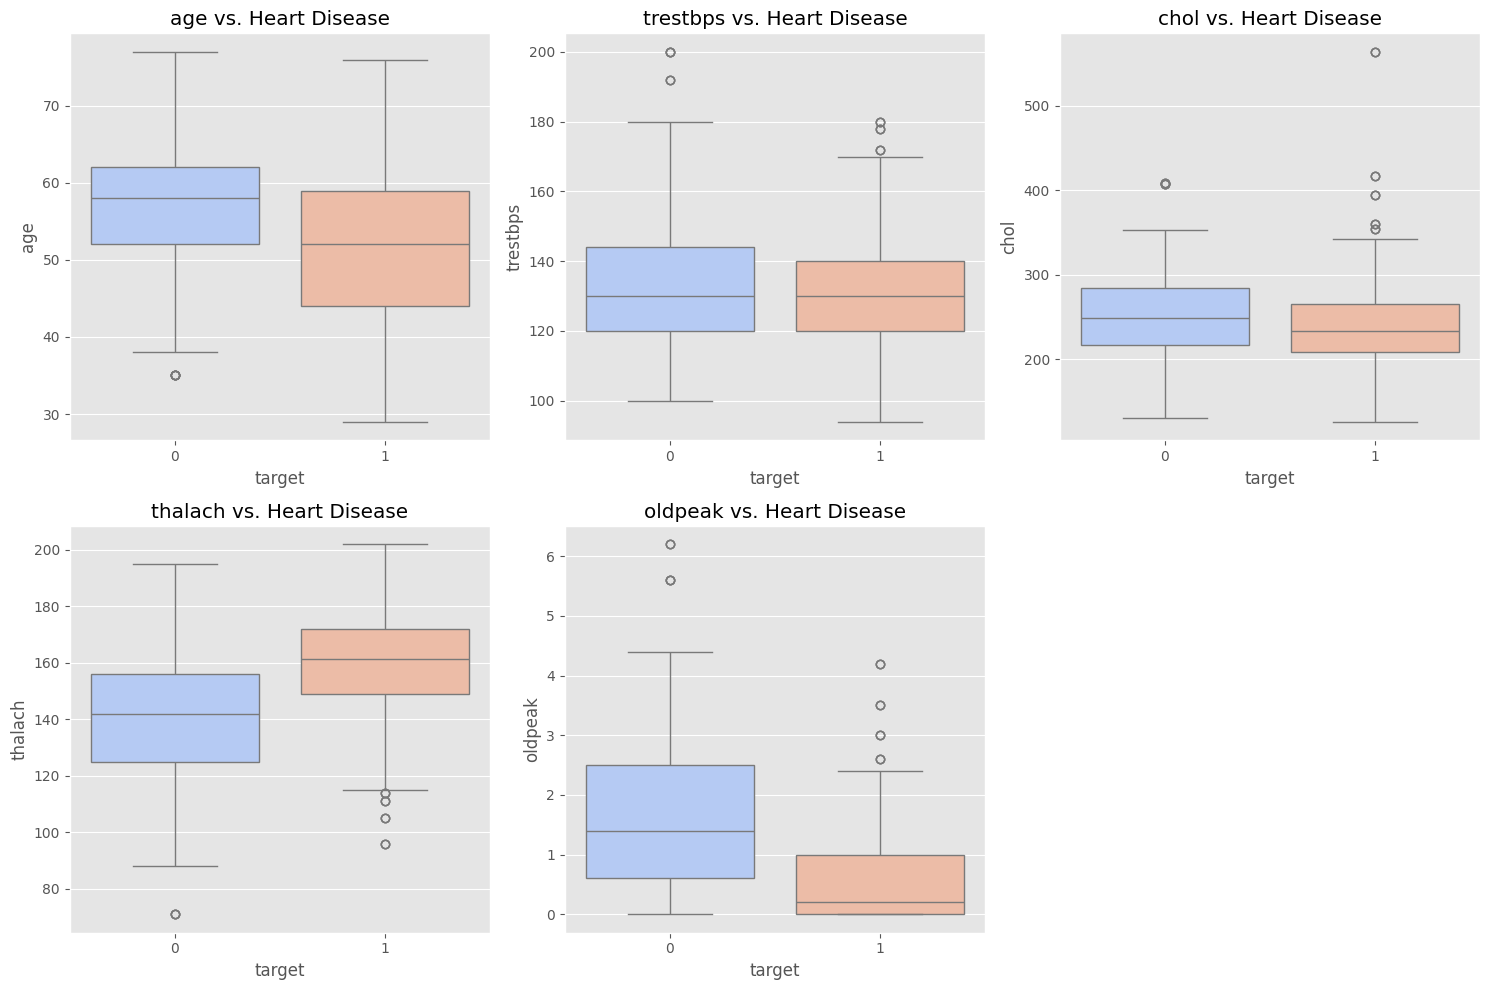

In [11]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df["target"], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs. Heart Disease")
    
plt.tight_layout()
plt.show()

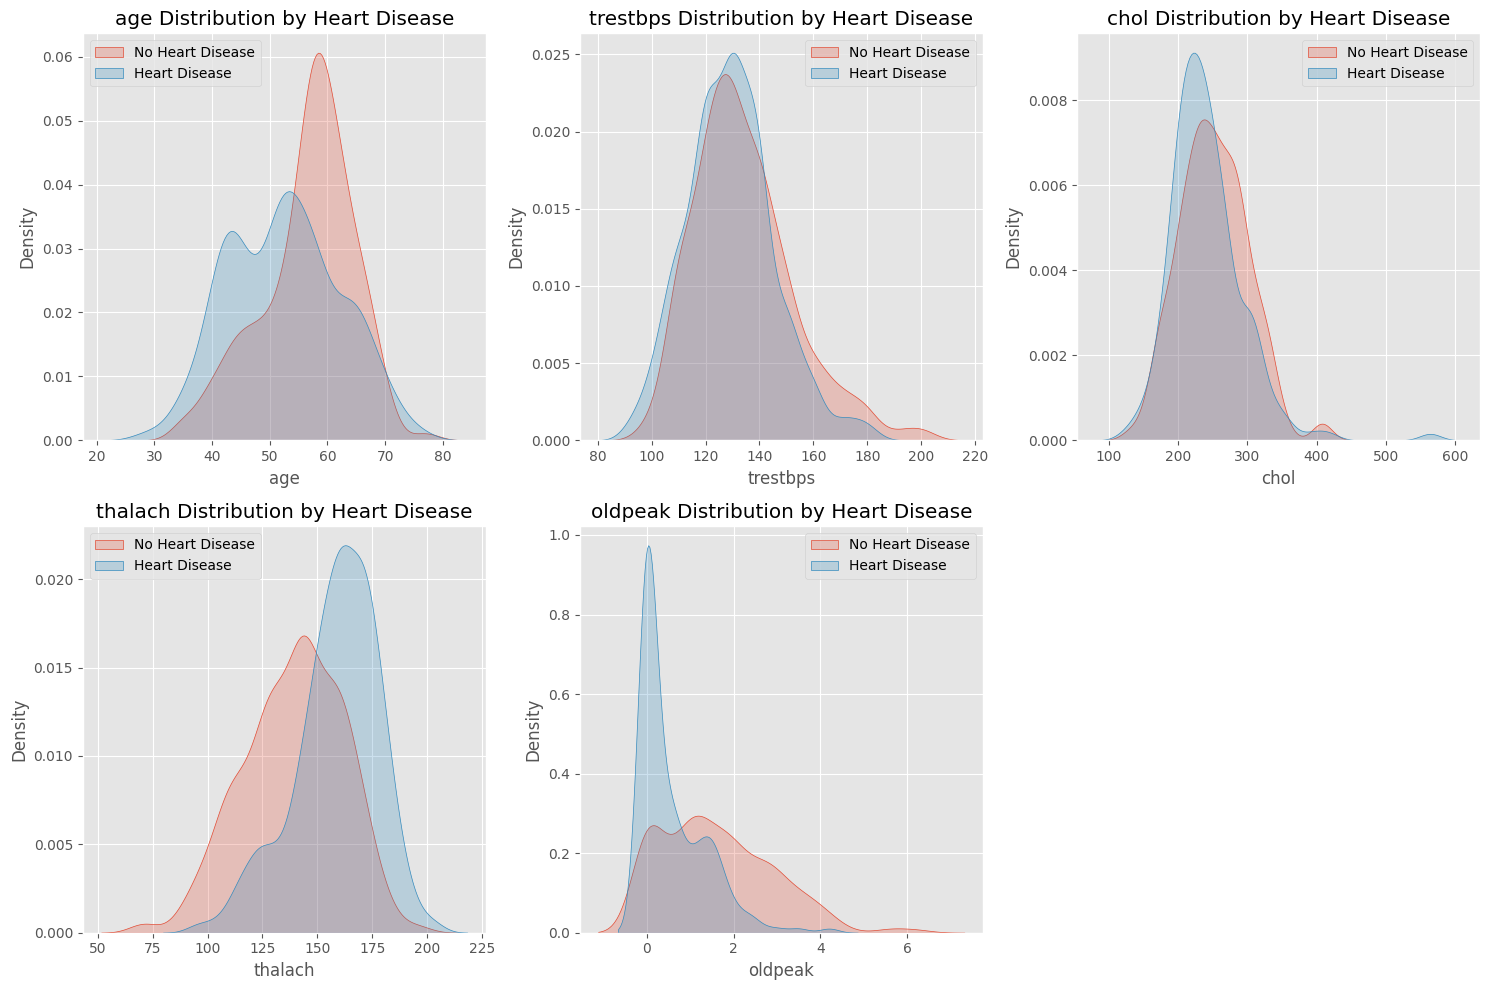

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[df["target"] == 0][col], label="No Heart Disease", shade=True)
    sns.kdeplot(df[df["target"] == 1][col], label="Heart Disease", shade=True)
    plt.title(f"{col} Distribution by Heart Disease")
    plt.legend()

plt.tight_layout()
plt.show()

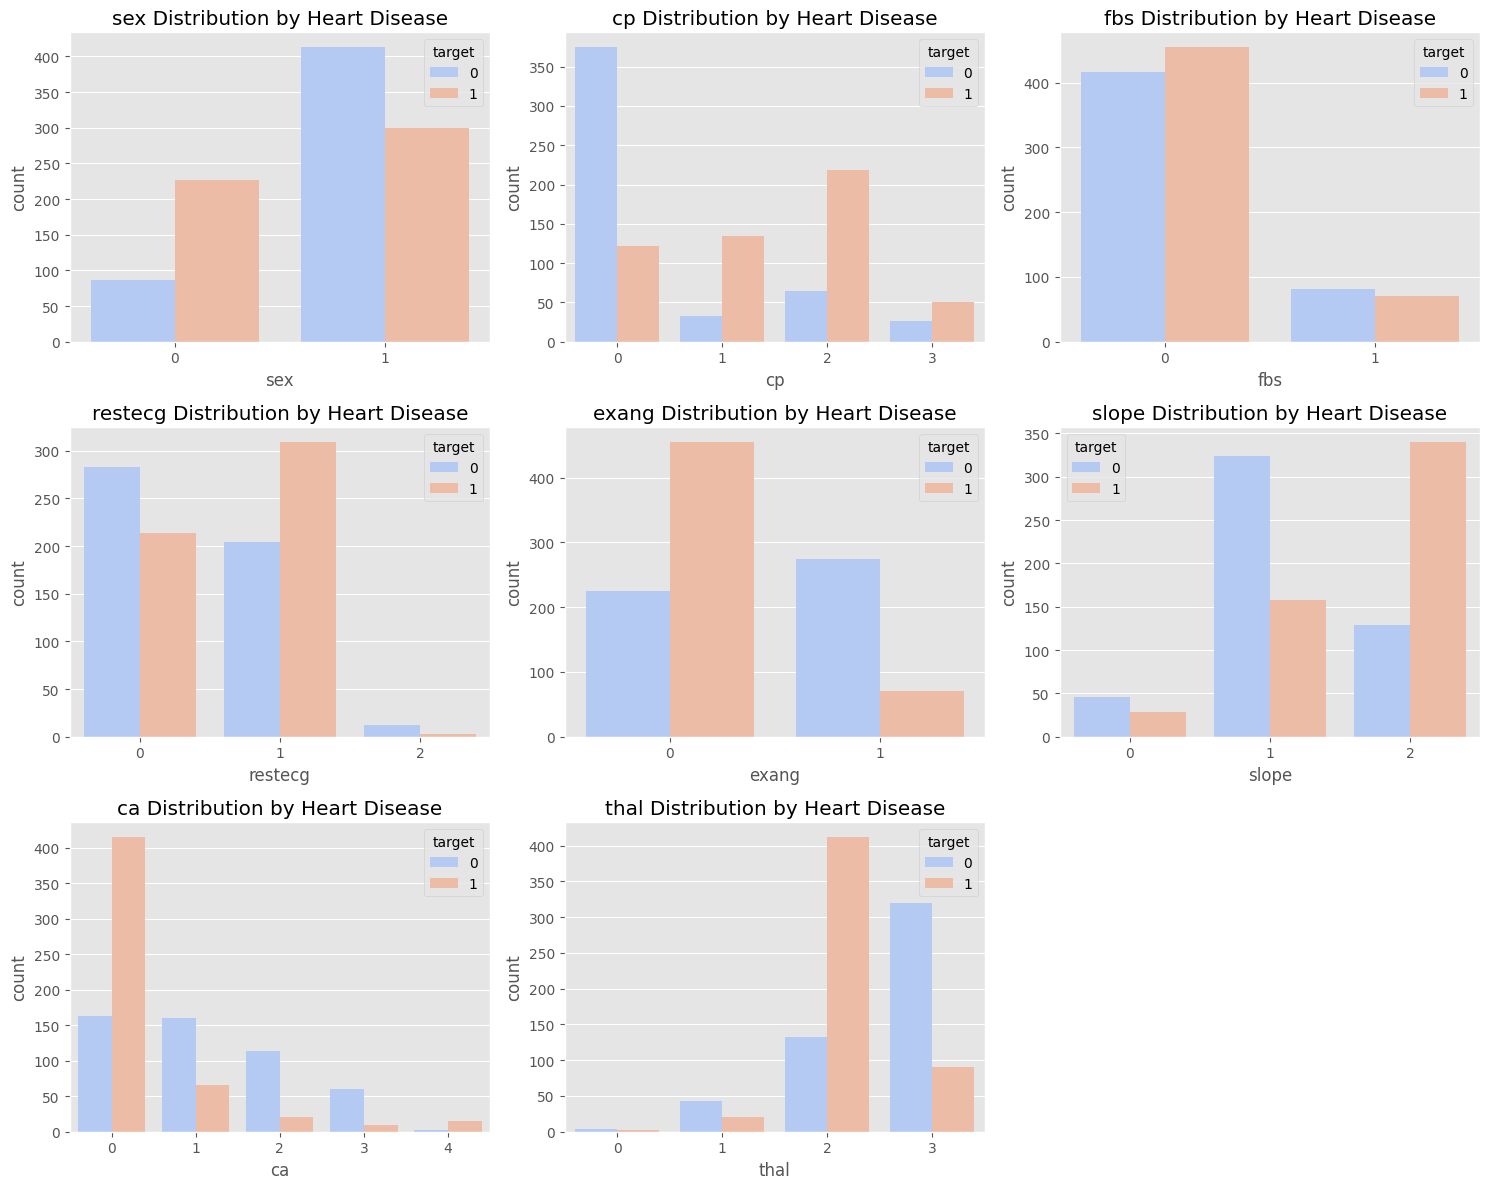

In [13]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[col], hue=df["target"], palette="coolwarm")
    plt.title(f"{col} Distribution by Heart Disease")

plt.tight_layout()
plt.show()

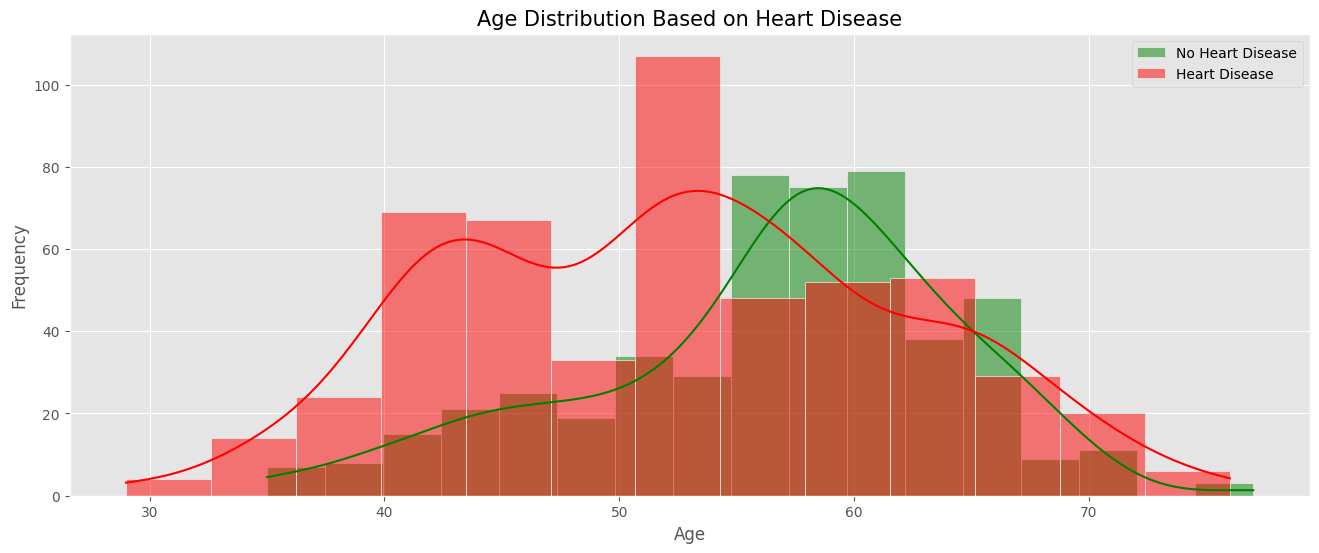

Min Age (No Heart Disease): 35
Max Age (No Heart Disease): 77
Average Age (No Heart Disease): 56.57
Min Age (Heart Disease): 29
Max Age (Heart Disease): 76
Average Age (Heart Disease): 52.41


In [14]:
plt.figure(figsize=(16,6))
sns.histplot(df[df['target'] == 0]['age'], color='green', kde=True, label='No Heart Disease')
sns.histplot(df[df['target'] == 1]['age'], color='red', kde=True, label='Heart Disease')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution Based on Heart Disease', fontsize=15)
plt.legend()
plt.show()

# Min, Max, and Average Age Analysis
print(f"Min Age (No Heart Disease): {df[df['target'] == 0]['age'].min()}")
print(f"Max Age (No Heart Disease): {df[df['target'] == 0]['age'].max()}")
print(f"Average Age (No Heart Disease): {df[df['target'] == 0]['age'].mean():.2f}")

print(f"Min Age (Heart Disease): {df[df['target'] == 1]['age'].min()}")
print(f"Max Age (Heart Disease): {df[df['target'] == 1]['age'].max()}")
print(f"Average Age (Heart Disease): {df[df['target'] == 1]['age'].mean():.2f}")

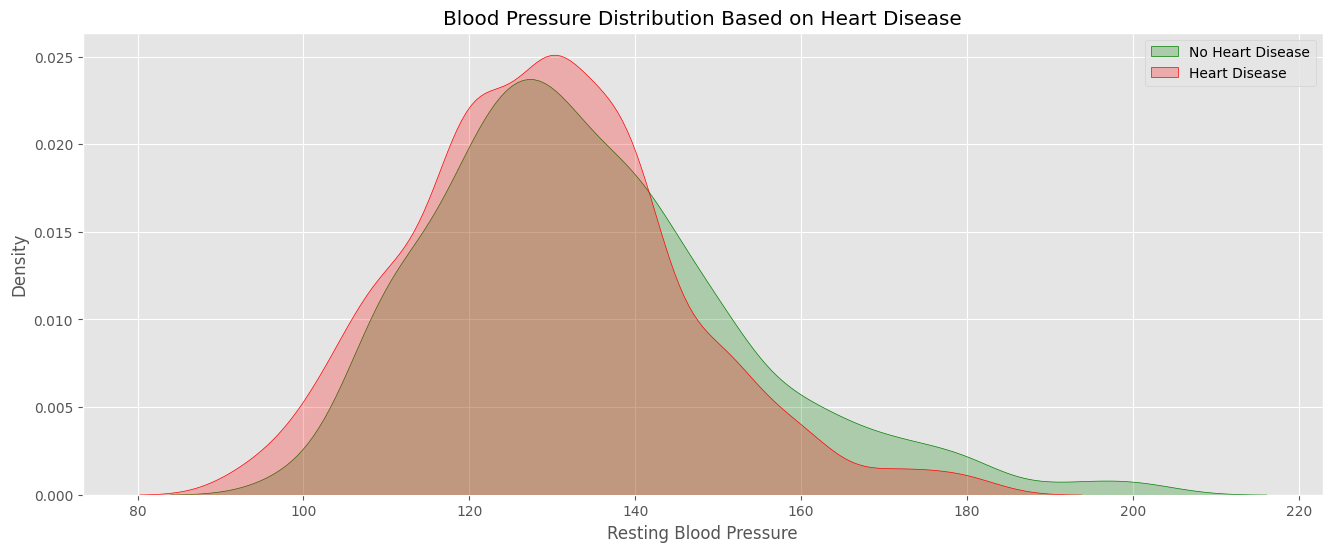

Min BP (No Heart Disease): 100
Max BP (No Heart Disease): 200
Average BP (No Heart Disease): 134.11
Min BP (Heart Disease): 94
Max BP (Heart Disease): 180
Average BP (Heart Disease): 129.25


In [15]:
plt.figure(figsize=(16,6))
sns.kdeplot(df[df['target'] == 0]['trestbps'], color='green', shade=True, label='No Heart Disease')
sns.kdeplot(df[df['target'] == 1]['trestbps'], color='red', shade=True, label='Heart Disease')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Density')
plt.title('Blood Pressure Distribution Based on Heart Disease')
plt.legend()
plt.show()

# Min, Max, and Average Blood Pressure
print(f"Min BP (No Heart Disease): {df[df['target'] == 0]['trestbps'].min()}")
print(f"Max BP (No Heart Disease): {df[df['target'] == 0]['trestbps'].max()}")
print(f"Average BP (No Heart Disease): {df[df['target'] == 0]['trestbps'].mean():.2f}")

print(f"Min BP (Heart Disease): {df[df['target'] == 1]['trestbps'].min()}")
print(f"Max BP (Heart Disease): {df[df['target'] == 1]['trestbps'].max()}")
print(f"Average BP (Heart Disease): {df[df['target'] == 1]['trestbps'].mean():.2f}")


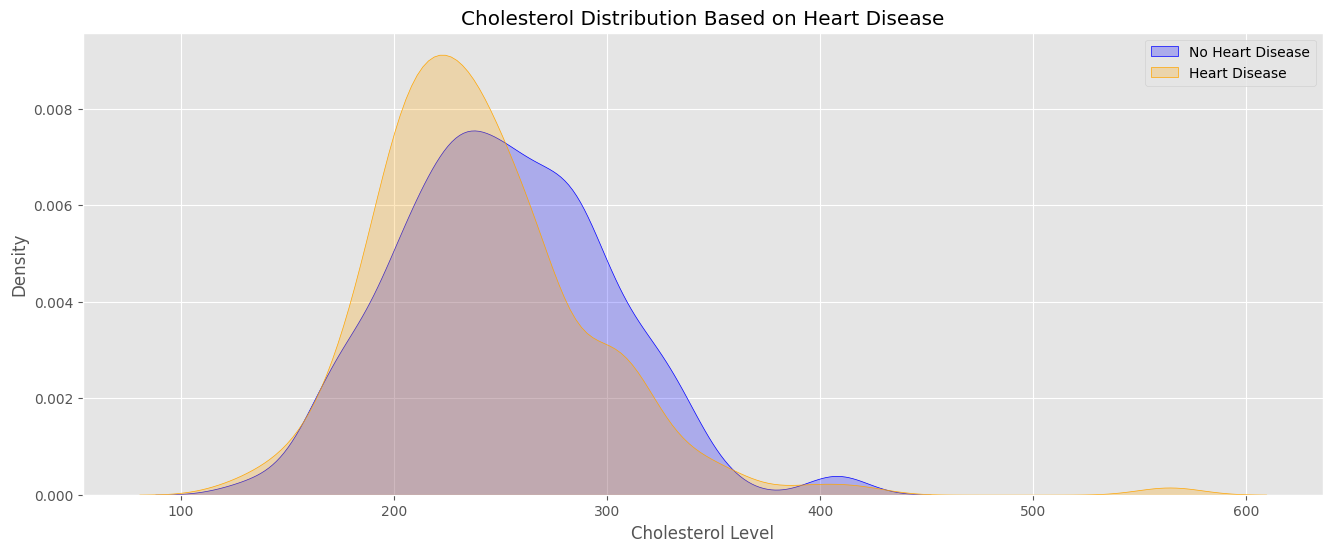

Min Cholesterol (No Heart Disease): 131
Max Cholesterol (No Heart Disease): 409
Average Cholesterol (No Heart Disease): 251.29
Min Cholesterol (Heart Disease): 126
Max Cholesterol (Heart Disease): 564
Average Cholesterol (Heart Disease): 240.98


In [16]:
plt.figure(figsize=(16,6))
sns.kdeplot(df[df['target'] == 0]['chol'], color='blue', shade=True, label='No Heart Disease')
sns.kdeplot(df[df['target'] == 1]['chol'], color='orange', shade=True, label='Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.title('Cholesterol Distribution Based on Heart Disease')
plt.legend()
plt.show()

print(f"Min Cholesterol (No Heart Disease): {df[df['target'] == 0]['chol'].min()}")
print(f"Max Cholesterol (No Heart Disease): {df[df['target'] == 0]['chol'].max()}")
print(f"Average Cholesterol (No Heart Disease): {df[df['target'] == 0]['chol'].mean():.2f}")

print(f"Min Cholesterol (Heart Disease): {df[df['target'] == 1]['chol'].min()}")
print(f"Max Cholesterol (Heart Disease): {df[df['target'] == 1]['chol'].max()}")
print(f"Average Cholesterol (Heart Disease): {df[df['target'] == 1]['chol'].mean():.2f}")

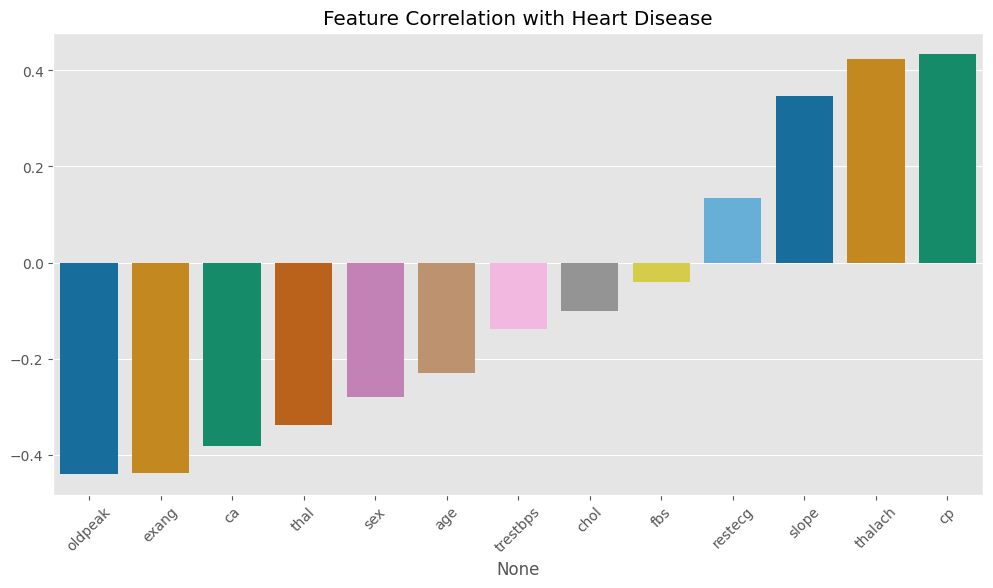

In [17]:
corr = df.corr()["target"].drop("target").sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=corr.index, y=corr.values, palette='colorblind',legend=False)
plt.xticks(rotation=45)
plt.title("Feature Correlation with Heart Disease")
plt.show()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = ['sex', 'fbs', 'exang', 'slope', 'ca', 'thal', 'cp', 'restecg']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),  # Standardize numerical features
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)  # One-Hot Encode categorical features
])

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

from sklearn.model_selection import GridSearchCV

# Function to train and tune the model using Grid Search
def train_and_tune_model(model, param_grid):
    print(f"🔍 Performing Grid Search for {model.__class__.__name__}")

    # Define Pipeline (Preprocessing + Model)
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Getting best model from Grid Search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"✅ Best parameters found: {best_params}")

    # Model Prediction
    y_val_pred = best_model.predict(X_val)

    # Results 
    val_results = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred)
    }

    print("✅ Model Evaluation Results on Validation Set:")
    display(pd.DataFrame([val_results]))

    # Predicting the best model on the test set
    y_test_pred = best_model.predict(X_test)

    test_results = {
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test F1 Score": f1_score(y_test, y_test_pred)
    }

    print("✅ Final Model Evaluation on Test Set:")
    display(pd.DataFrame([test_results]))

    return best_model, val_results, test_results


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix - Best Model")
    plt.show()

# ROC Curve
def plot_roc_curve(model, X_val, y_val):
    y_val_probs = model.predict_proba(X_val)[:, 1]  # Get probability of class 1
    fpr, tpr, _ = roc_curve(y_val, y_val_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Best Model")
    plt.legend()
    plt.grid()
    plt.show()

# Importance feature
def plot_feature_importance(model):
    if hasattr(model.named_steps['classifier'], "feature_importances_"): 
        feature_importance = model.named_steps['classifier'].feature_importances_
        feature_names = model.named_steps['preprocessing'].get_feature_names_out()
        sorted_idx = feature_importance.argsort()[::-1]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="coolwarm")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Feature Name")
        plt.title("Feature Importance - Best Model")
        plt.show()

# Performance Bar Chart
def plot_performance_chart(results_df):
    results_df.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
    plt.title("Model Performance on Validation vs. Test Set")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.grid(axis="y")
    plt.show()


🔍 Performing Grid Search for RandomForestClassifier
✅ Best parameters found: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
✅ Model Evaluation Results on Validation Set:


,Accuracy,Precision,Recall,F1 Score
0,0.97561,0.990196,0.961905,0.975845


✅ Final Model Evaluation on Test Set:


,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,0.97561,0.971698,0.980952,0.976303


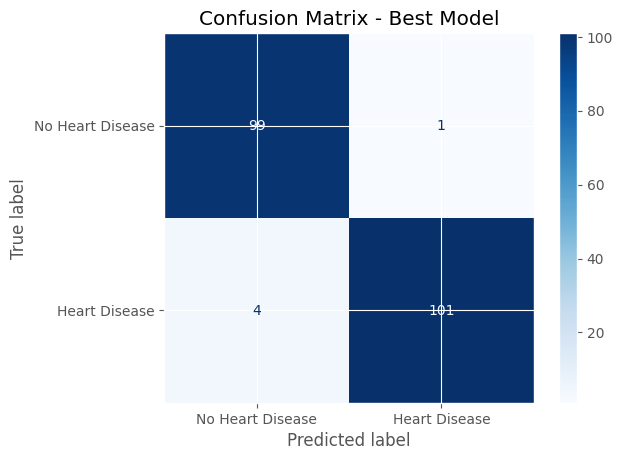

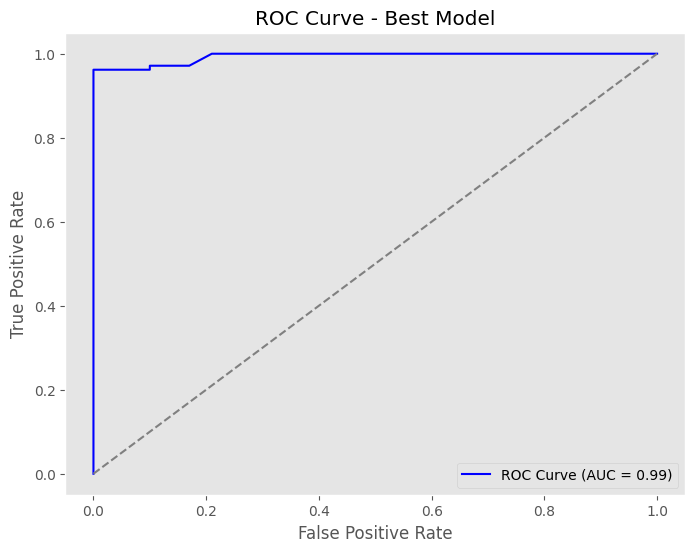

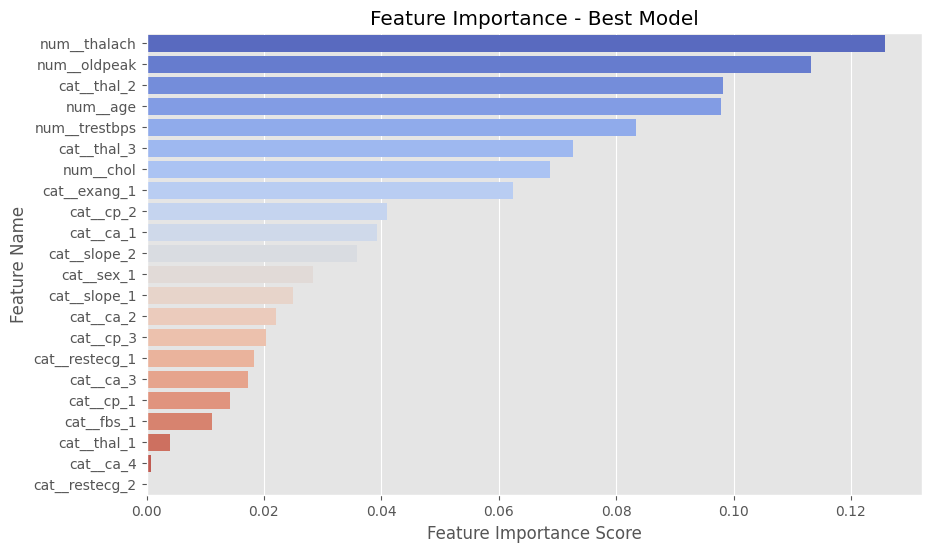

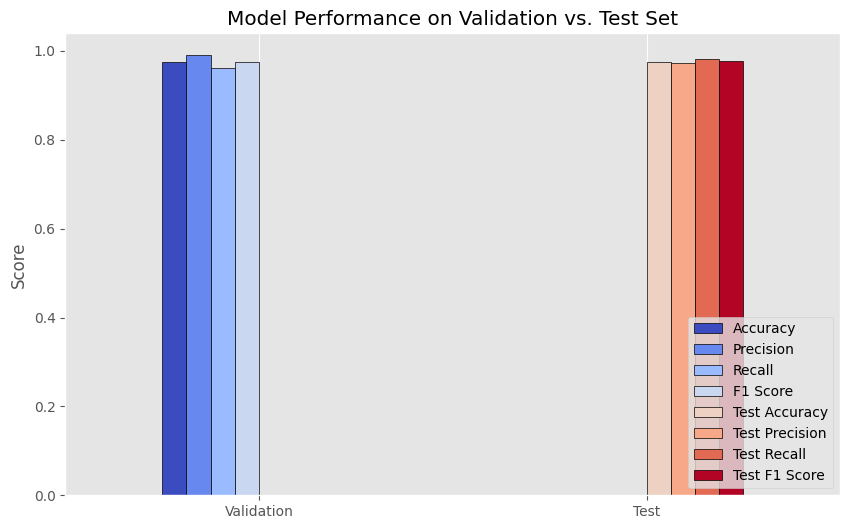

In [22]:
from sklearn.ensemble import RandomForestClassifier

chosen_model = RandomForestClassifier(random_state=42)
param_grid = {
    "classifier__n_estimators": [50, 100, 200],  # Number of trees
    "classifier__max_depth": [None, 10, 20]  # Tree depth
}

best_rf_model, val_results, test_results = train_and_tune_model(chosen_model, param_grid)

plot_confusion_matrix(y_val, best_rf_model.predict(X_val))

plot_roc_curve(best_rf_model, X_val, y_val)

plot_feature_importance(best_rf_model)

results_df = pd.DataFrame([val_results, test_results], index=["Validation", "Test"])
plot_performance_chart(results_df)

🔍 Performing Grid Search for XGBClassifier
✅ Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
✅ Model Evaluation Results on Validation Set:


,Accuracy,Precision,Recall,F1 Score
0,0.95122,0.961165,0.942857,0.951923


✅ Final Model Evaluation on Test Set:


,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,0.970732,0.980583,0.961905,0.971154


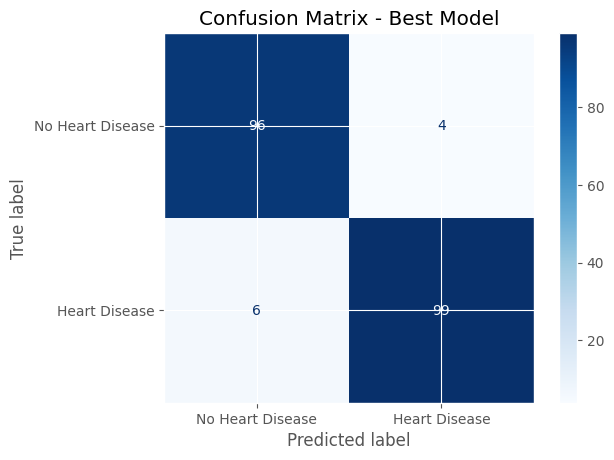

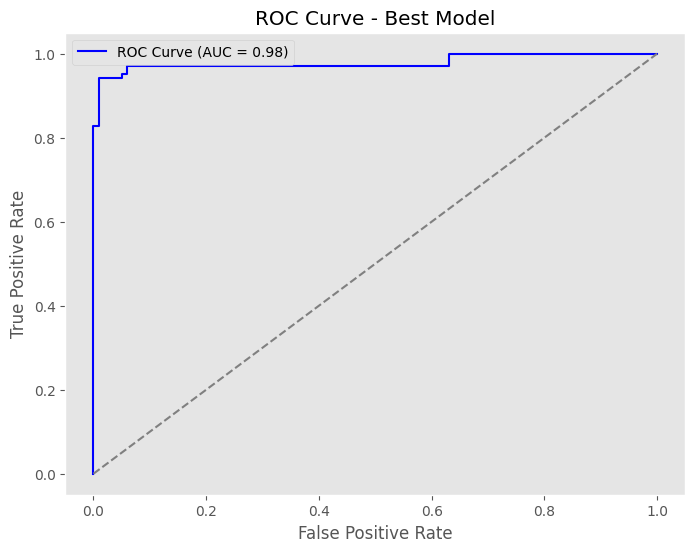

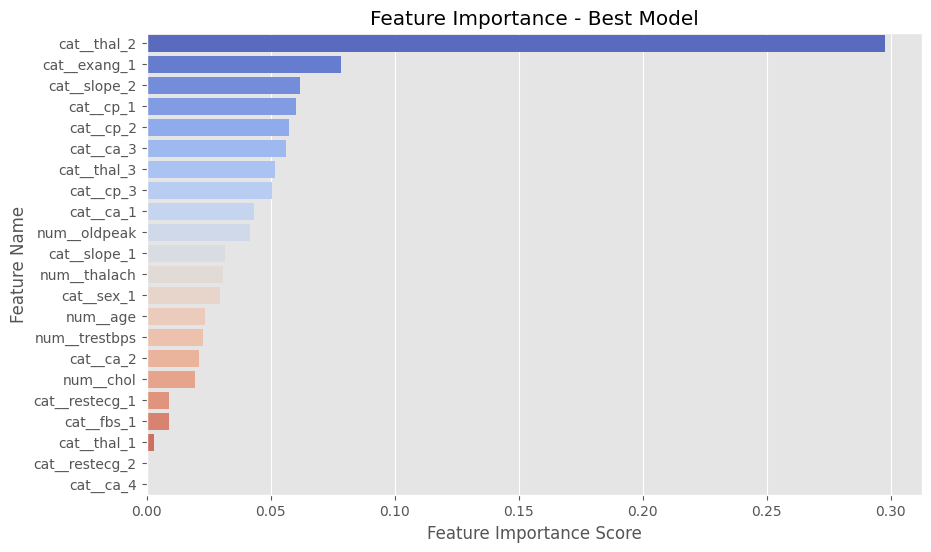

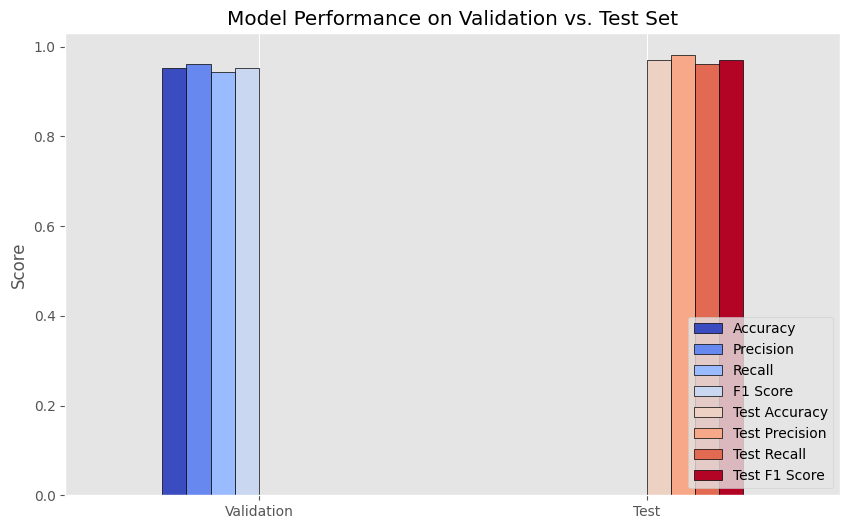

In [23]:
from xgboost import XGBClassifier

chosen_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)
param_grid = {
    "classifier__learning_rate": [0.01, 0.1, 0.2],  # Learning rate
    "classifier__n_estimators": [50, 100, 200],  # Number of trees
    "classifier__max_depth": [3, 5, 7]  # Tree depth
}


best_xgb_model, val_results, test_results = train_and_tune_model(chosen_model, param_grid)

plot_confusion_matrix(y_val, best_xgb_model.predict(X_val))

plot_roc_curve(best_xgb_model, X_val, y_val)

plot_feature_importance(best_xgb_model)

results_df = pd.DataFrame([val_results, test_results], index=["Validation", "Test"])
plot_performance_chart(results_df)

🔍 Performing Grid Search for GradientBoostingClassifier
✅ Best parameters found: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 50}
✅ Model Evaluation Results on Validation Set:


,Accuracy,Precision,Recall,F1 Score
0,0.97561,0.990196,0.961905,0.975845


✅ Final Model Evaluation on Test Set:


,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,0.97561,0.971698,0.980952,0.976303


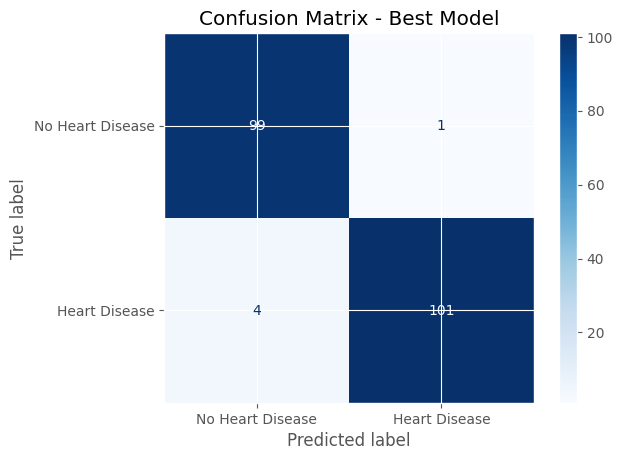

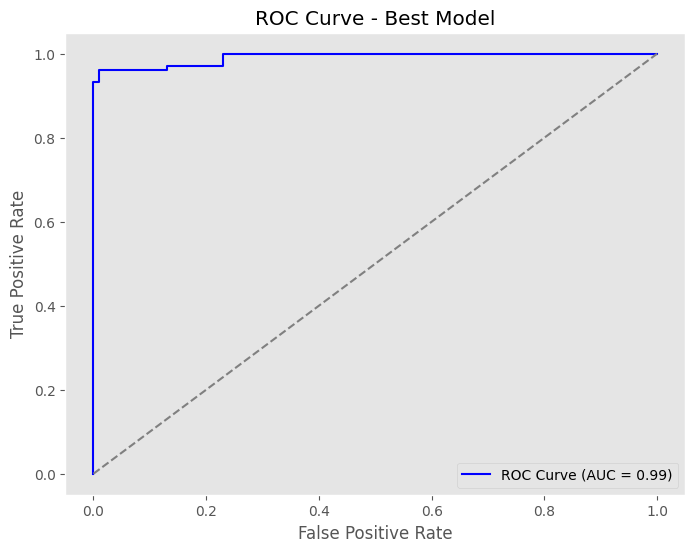

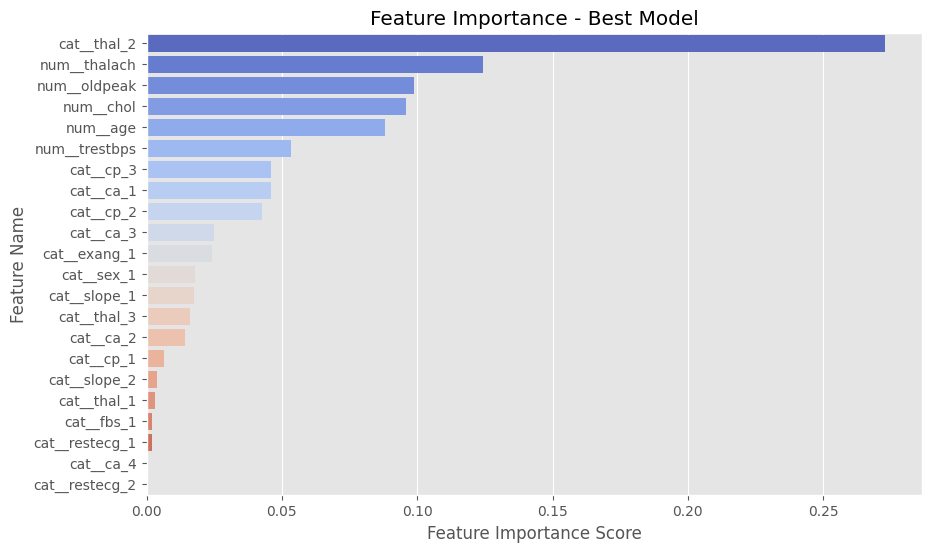

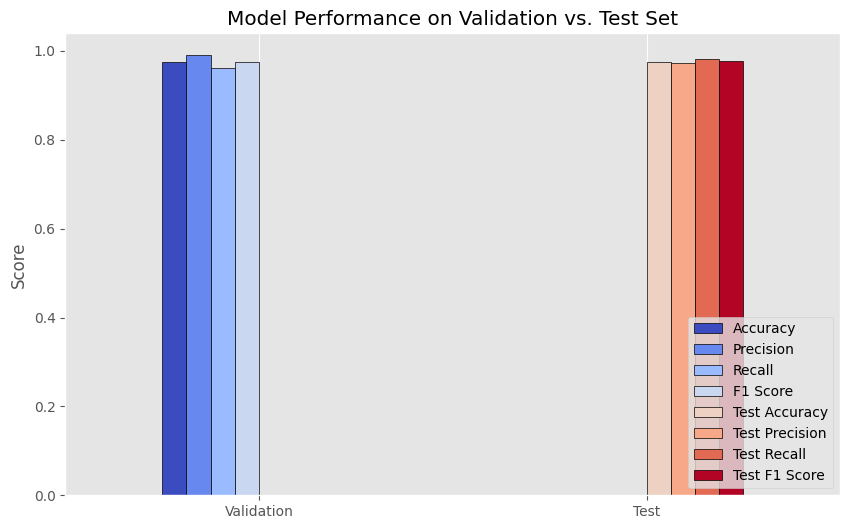

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


chosen_model = GradientBoostingClassifier(random_state=42)
param_grid = {
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [3, 5, 7]
}

best_gbm_model, val_results, test_results = train_and_tune_model(chosen_model, param_grid)

plot_confusion_matrix(y_val, best_gbm_model.predict(X_val))

plot_roc_curve(best_gbm_model, X_val, y_val)

plot_feature_importance(best_gbm_model)

results_df = pd.DataFrame([val_results, test_results], index=["Validation", "Test"])
plot_performance_chart(results_df)

🔍 Performing Grid Search for LGBMClassifier
[LightGBM] [Info] Number of positive: 316, number of negative: 299
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513821 -> initscore=0.055299
[LightGBM] [Info] Start training from score 0.055299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

  File "C:\Users\redch\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\redch\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\redch\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

,Accuracy,Precision,Recall,F1 Score
0,0.956098,0.961538,0.952381,0.956938


✅ Final Model Evaluation on Test Set:


,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,0.965854,0.971154,0.961905,0.966507


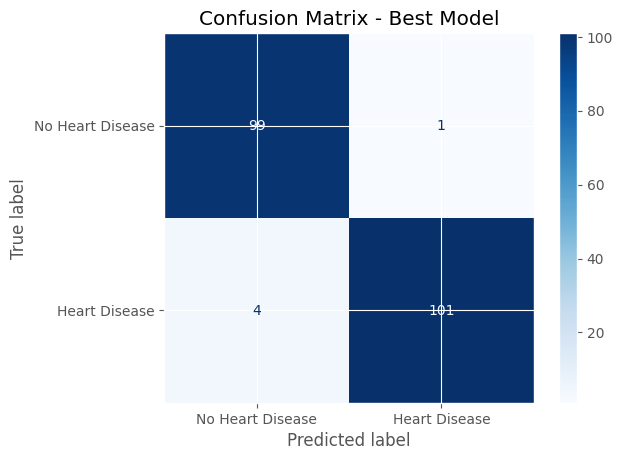

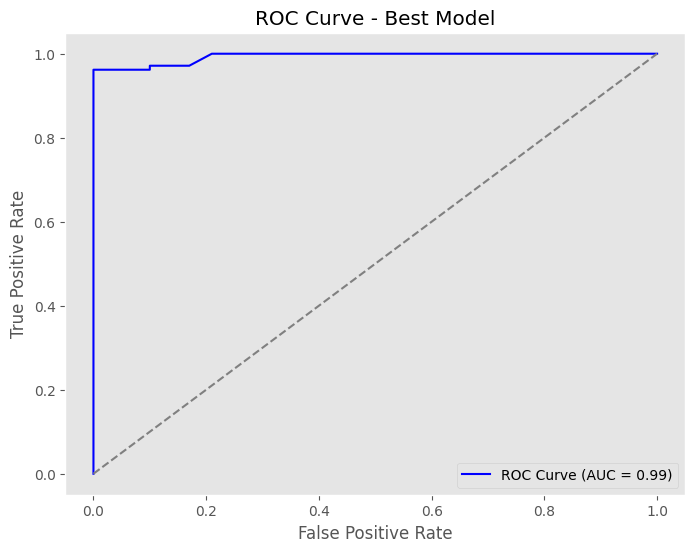

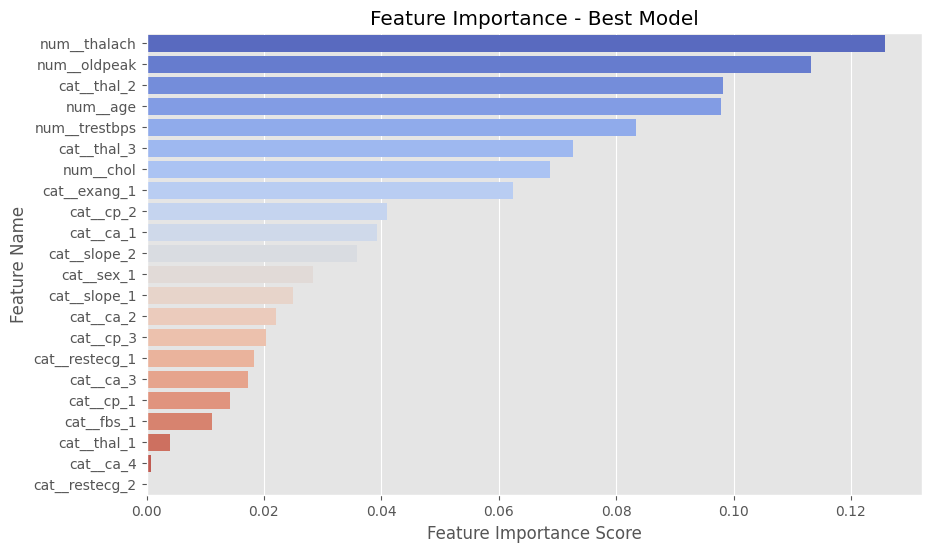

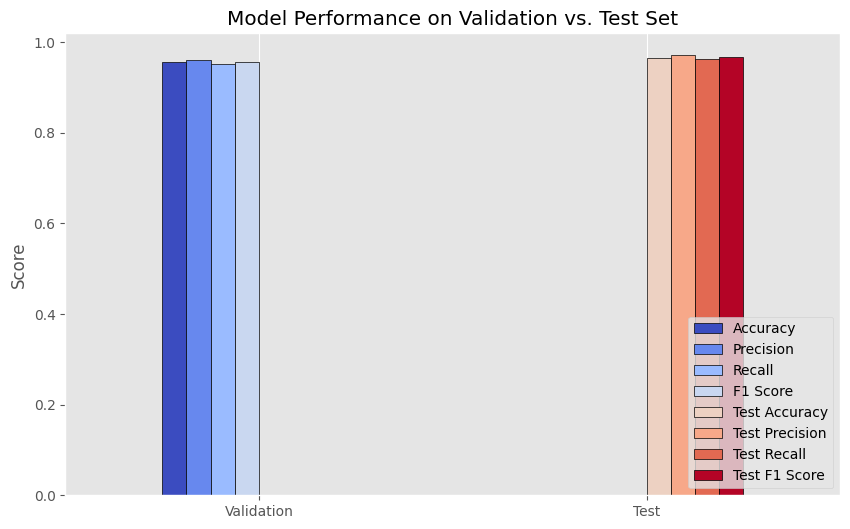

In [25]:
from lightgbm import LGBMClassifier

chosen_model = LGBMClassifier(random_state=42)
param_grid = {
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [-1, 5, 10]
}

best_lgbm_model, val_results, test_results = train_and_tune_model(chosen_model, param_grid)

plot_confusion_matrix(y_val, best_rf_model.predict(X_val))

plot_roc_curve(best_rf_model, X_val, y_val)

plot_feature_importance(best_rf_model)

results_df = pd.DataFrame([val_results, test_results], index=["Validation", "Test"])
plot_performance_chart(results_df)

🔍 Performing Grid Search for MLPClassifier
✅ Best parameters found: {'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50, 50)}
✅ Model Evaluation Results on Validation Set:


,Accuracy,Precision,Recall,F1 Score
0,0.946341,0.951923,0.942857,0.947368


✅ Final Model Evaluation on Test Set:


,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,0.965854,0.953704,0.980952,0.967136


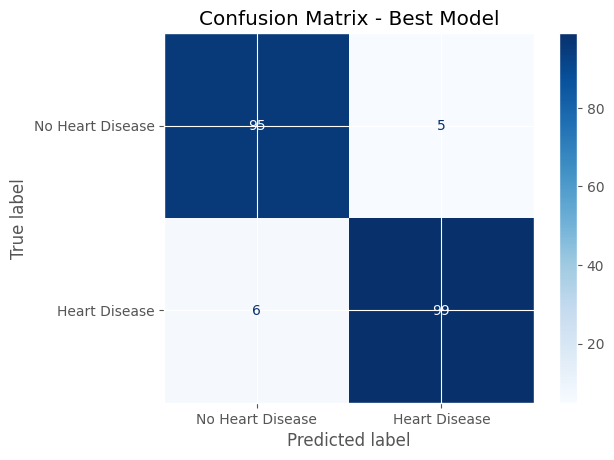

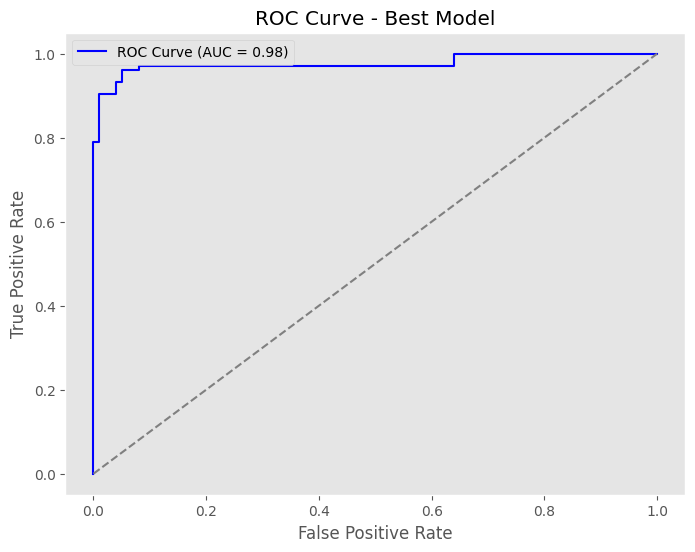

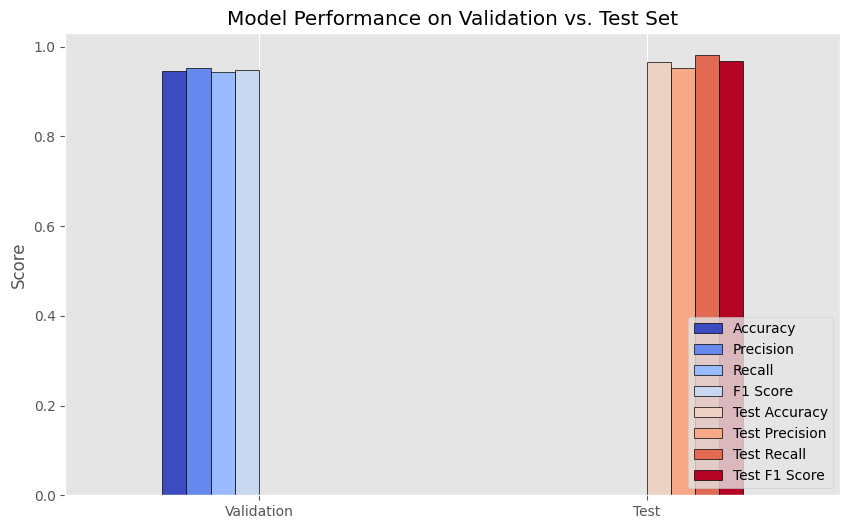

In [26]:
from sklearn.neural_network import MLPClassifier

# Define model & parameter grid
chosen_model = MLPClassifier(random_state=42)
param_grid = {
    "classifier__hidden_layer_sizes": [(50,), (100,), (50,50)],  # Number of neurons
    "classifier__activation": ["relu", "tanh"],  # Activation functions
    "classifier__alpha": [0.0001, 0.001, 0.01]  # Regularization parameter
}

best_mlp_model, val_results, test_results = train_and_tune_model(chosen_model, param_grid)

plot_confusion_matrix(y_val, best_mlp_model.predict(X_val))

plot_roc_curve(best_mlp_model, X_val, y_val)

plot_feature_importance(best_mlp_model)

results_df = pd.DataFrame([val_results, test_results], index=["Validation", "Test"])
plot_performance_chart(results_df)

In [ ]:
import joblib
joblib.dump(best_rf_model, "heart_disease_model.pkl")
print("✅ Model saved successfully as 'heart_disease_model.pkl'")

In [ ]:
%%writefile app.py

from flask import Flask, request, jsonify
import joblib
import numpy as np


app = Flask(__name__)
model = joblib.load("heart_disease_model.pkl")

@app.route("/")
def home():
    return "Heart Disease Prediction API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        
        data = request.json
        features = np.array(data["features"]).reshape(1, -1)

        prediction = model.predict(features)[0]

        result = "Heart Disease Detected" if prediction == 1 else "No Heart Disease"

        return jsonify({"prediction": result})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True)


In [ ]:
print("Training Data Feature Count:", X_train.shape[1])
print("Feature Names:", list(X_train.columns))